In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

## Line plots

#### example 1 - plt.errorbar()
the pyplot errorbar function is similar to a scatterplot except all the points are connected by lines.  If the points 
are not in order of the x-axis the plot will be a mess unless modified

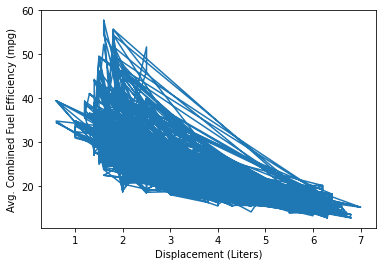

In [5]:
#the mess of the original, unchanged data
plt.errorbar(data=fuel_econ, x='displ', y='comb');
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');
plt.xlabel('Displacement (Liters)');

Instead, let's set the number of points within bins of displacement and take the mean of those bins.  We can then use 
errorbar() to show the trend as a change in the x-axis value

In [6]:
fuel_econ[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [7]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# cut the bin values into discrete intervals. returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [11]:
bin_centers

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9])

In [8]:
# for the points in each bin, we compute the mean and standard deviation of the mean
fuel_econ['comb'].groupby(displ_binned).mean()

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
Name: comb, dtype: float64

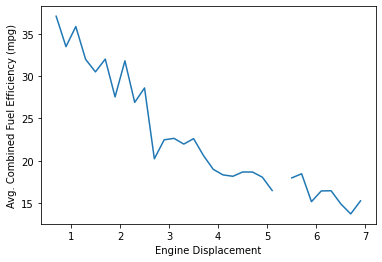

In [9]:
# for thge poinbts in each bin, we compute the mean and std error of the mean
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

#plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');
plt.xlabel('Engine Displacement');

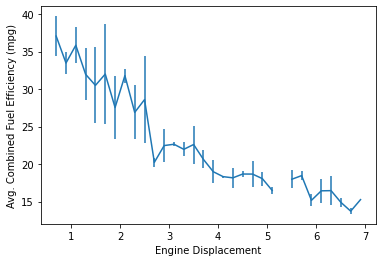

In [10]:
#plot the summarized data with error bars
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');
plt.xlabel('Engine Displacement');